2. Plot the halo gas fraction as a function of halo mass. How does this compare to the universal baryon fraction?

In [1]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
basePath = '../sims.TNG/TNG100-1/output/'

In [3]:
fields = ['GroupMassType', 'GroupMass']
halos = il.groupcat.loadHalos(basePath, 99, fields=fields)

In [4]:
halos['GroupMassType'].shape, halos['GroupMass'].shape

((6291349, 6), (6291349,))

In the tutorial python script, gas fraction is defined as gas mass over total baryonic mass (stars + gas).

In [5]:
len(halos['GroupMassType'][:, 0]),  len(halos['GroupMassType'][:, 4])

(6291349, 6291349)

In [6]:
np.count_nonzero(halos['GroupMassType'][:, 0] + halos['GroupMassType'][:, 4]), len(halos['GroupMassType'][:, 0] + halos['GroupMassType'][:, 4])

(6054710, 6291349)

In [7]:
gas_frac = []
index = []
for i in range(len(halos['GroupMassType'][:, 4])):
    if (halos['GroupMassType'][i, 0] + halos['GroupMassType'][i, 4]) != 0:
        index.append(i)
        gas_frac.append(halos['GroupMassType'][i, 0] / (halos['GroupMassType'][i, 0] + halos['GroupMassType'][i, 4]))

In [8]:
len(gas_frac), len(index)

(6054710, 6054710)

The sum of gas particles and stellar particles was found to be 0 for some halos. Hence, those halos are removed from further calculations.

In [9]:
halo_mass = []
for i in range(len(index)):
    halo_mass.append(halos['GroupMass'][i] * 1e10 / 0.6774)

In [10]:
mpl.rcParams['agg.path.chunksize'] = 10000 # Required while plotting a large number of points 
mpl.rcParams['path.simplify_threshold'] = 1.0

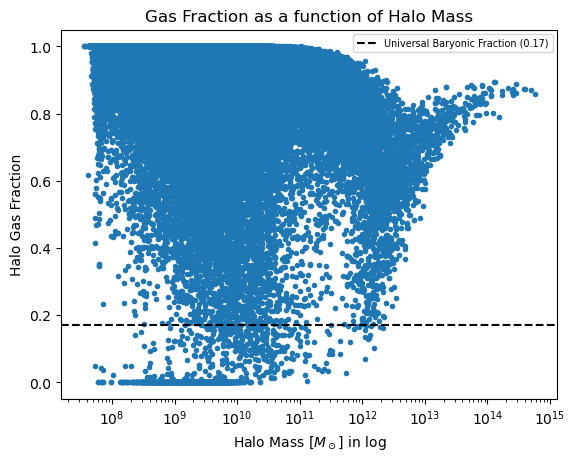

In [11]:
fig, ax = plt.subplots()

ax.plot(halo_mass, gas_frac, '.')

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('Halo Mass [$M_\odot$] in log')
ax.set_ylabel('Halo Gas Fraction')
ax.set_title('Gas Fraction as a function of Halo Mass')
ax.axhline(y=0.17, color='black', ls='--', label='Universal Baryonic Fraction (0.17)')
ax.legend(fontsize='x-small')
plt.show()

"We know that the fraction of baryons in the total matter of the Universe is 17%" - Posti et al.(2019)

From the plot, it can be decuded that most of the halos have gas fractions above the universal baryonic fraction (0.17). Only a few low-mass halos have gas fractions less than the baryonic fraction.